In [1]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20200727_all_wscomposite_nomiss_binsize1mb_3mbxo_3mbfill.csv'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”

 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [5]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  45.5 
    Genotypes (%):      AA:26.2  AB:47.7  BB:26.1  not BB:0.0  not AA:0.0 

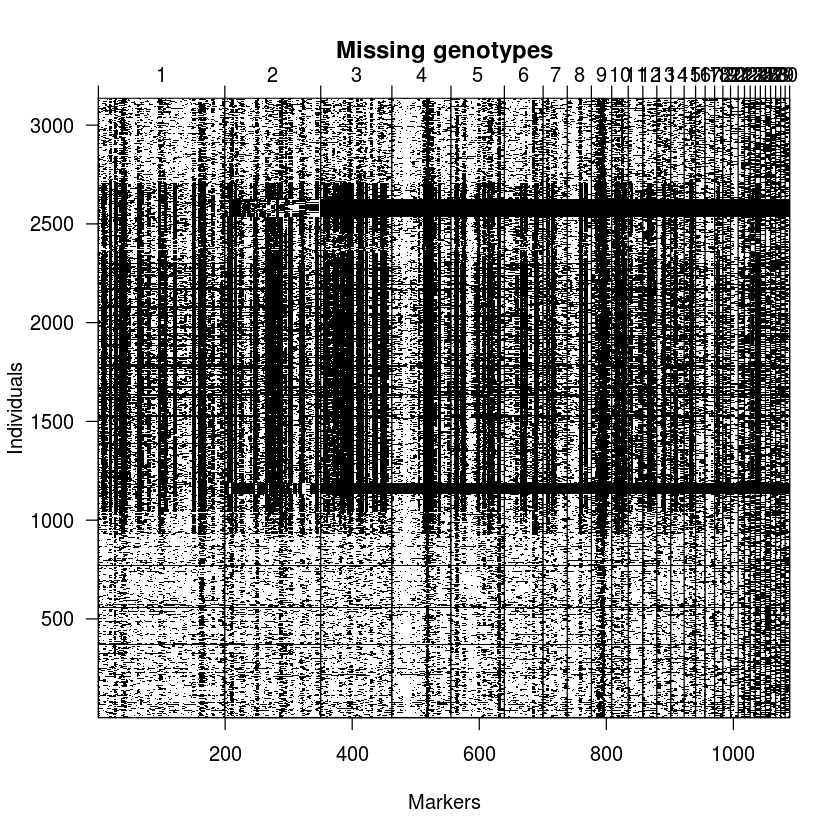

In [6]:
plotMissing(datf2)

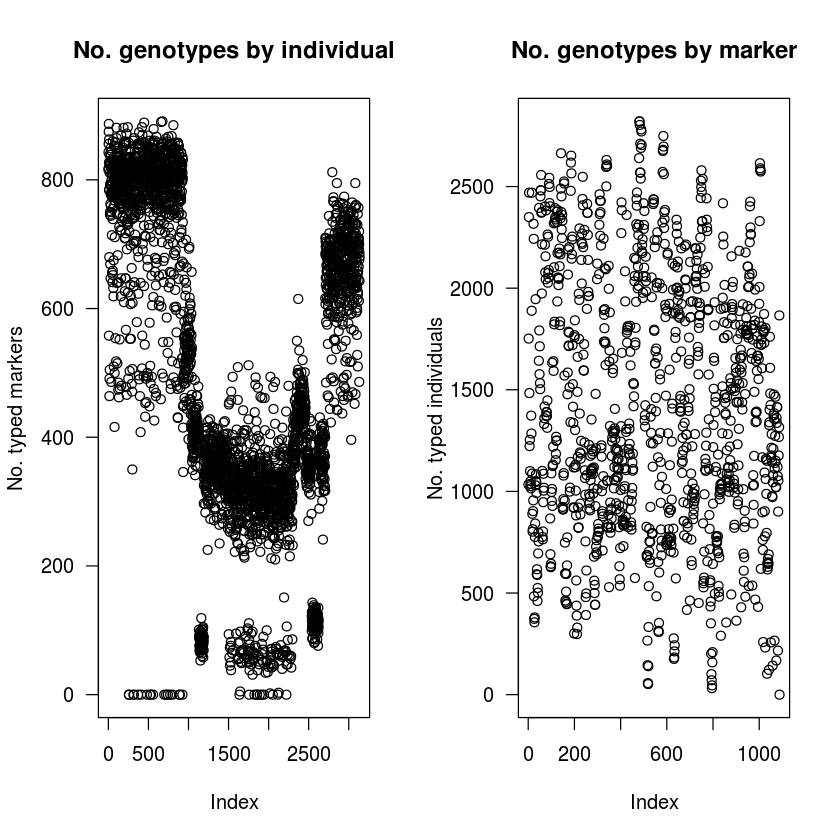

In [7]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [8]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 500])


In [9]:
todrop

[1] "1-24"  "1-25"  "1-26"  "1-27"  "1-39"  "1-160" "1-162" "1-165" "1-166"
[10] "1-198" "2-9"   "2-10"  "2-11"  "2-12"  "2-49"  "2-50"  "2-51"  "2-89" 
[19] "2-90"  "4-53"  "4-54"  "4-55"  "4-56"  "4-57"  "4-58"  "4-92"  "5-8"  
[28] "5-9"   "5-10"  "5-74"  "5-75"  "5-76"  "5-77"  "5-78"  "6-47"  "6-60" 
[37] "7-37"  "9-12"  "9-13"  "9-14"  "9-15"  "9-16"  "9-17"  "9-18"  "9-19" 
[46] "9-20"  "9-21"  "9-31"  "10-17" "10-25" "11-22" "12-21" "13-21" "14-20"
[55] "15-17" "18-12" "19-11" "21-9"  "22-8"  "23-7"  "24-7"  "25-7"  "26-7" 
[64] "27-7"  "28-7"  "29-6"  "30-6"

In [10]:
datf2.1 <- drop.markers(datf2, todrop)

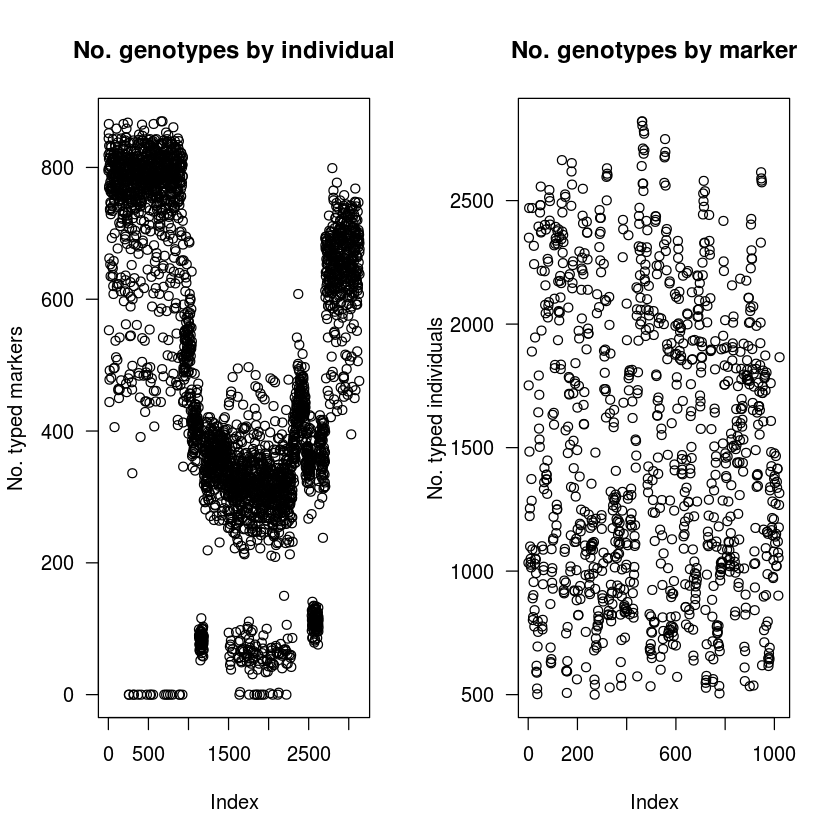

In [11]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [15]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers


In [16]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3080

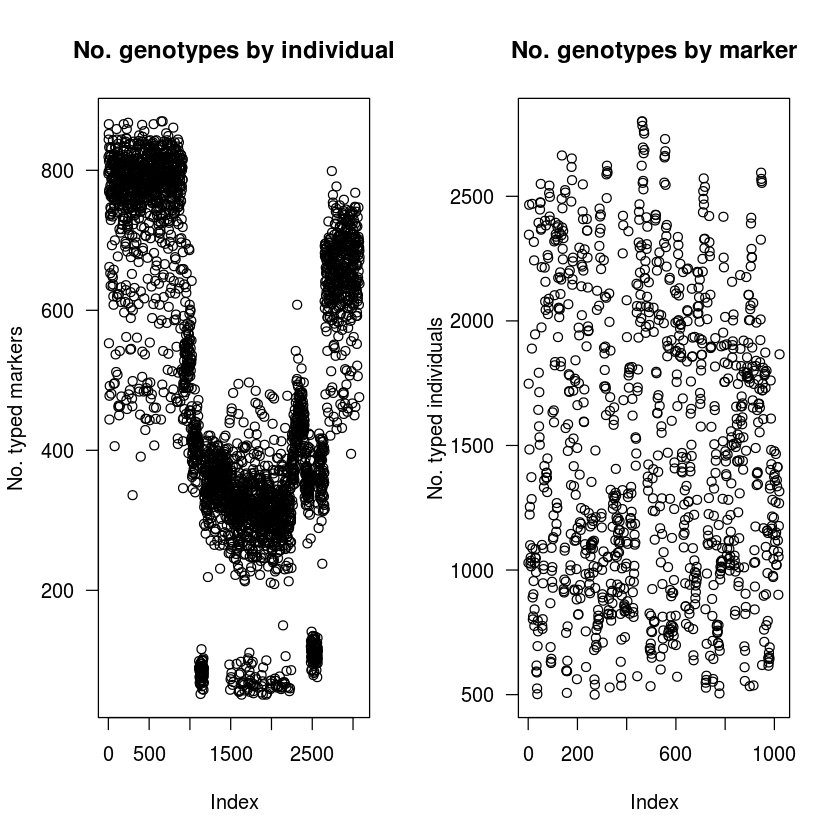

In [17]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [18]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3080 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1021 
    No. markers:        189 142 112 86 76 59 37 38 21 24 22 21 21 20 17 15 15 12 
                        11 12 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  48.6 
    Genotypes (%):      AA:26.2  AB:47.6  BB:26.1  not BB:0.0  not AA:0.0 

In [20]:
cg <- comparegeno(datf2.2)

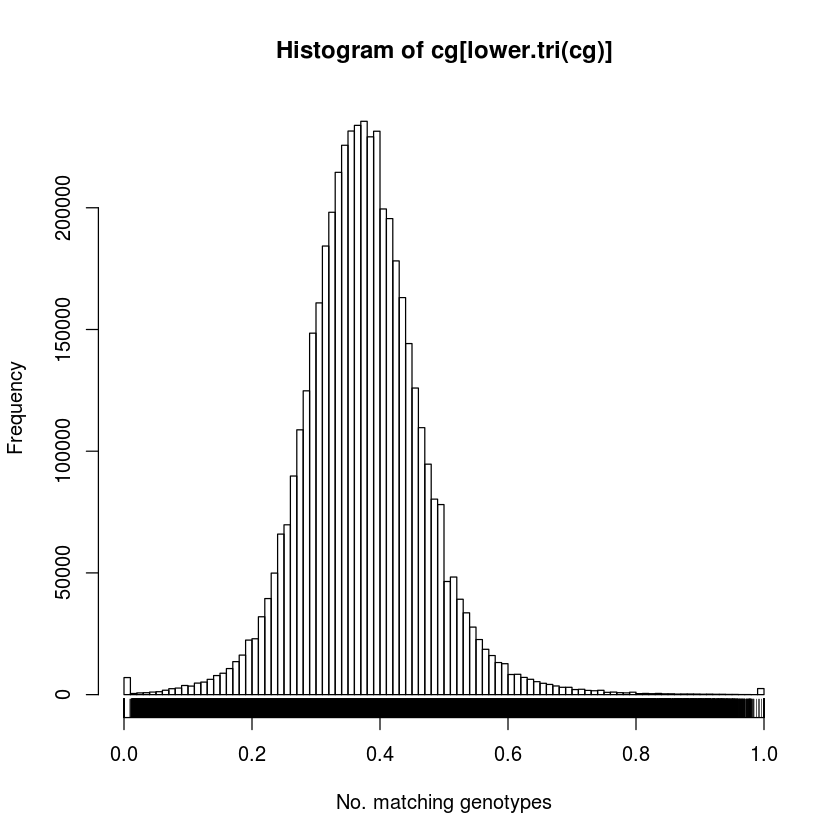

In [21]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [22]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [23]:
wh

row,col
417,508
364,529
417,529
508,529
417,537
529,537
364,575
417,575
529,575
537,575


In [24]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`2-2`
[1] "2-1"

$`2-149`
[1] "2-150"

$`3-2`
[1] "3-1"

$`3-110`
[1] "3-111"

$`5-2`
[1] "5-1"

$`5-82`
[1] "5-83"

$`6-56`
[1] "6-57" "6-58"

$`8-2`
[1] "8-0" "8-1"

$`8-35`
[1] "8-36"

$`8-34`
[1] "8-37"

$`16-11`
[1] "16-12" "16-13" "16-14"

$`17-13`
[1] "17-14"

$`20-8`
[1] "20-9"

$`20-10`
[1] "20-11"

$`25-3`
[1] "25-2"

$`28-5`
[1] "28-6"

$`29-3`
[1] "29-4"



In [25]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”

In [26]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-0,1,2051,135,607,287,0,0,1.062746e-17
1-1,1,1332,278,905,565,0,0,1.142126e-21
1-2,1,734,416,1150,780,0,0,1.889361e-25
1-3,1,614,449,1208,809,0,0,9.028660e-24
1-42,1,2385,132,404,159,0,0,3.588282e-05
1-43,1,2283,148,451,198,0,0,4.304240e-05
1-46,1,686,693,1188,513,0,0,1.238631e-06
1-59,1,864,507,1062,647,0,0,2.134885e-05
1-76,1,697,631,1294,458,0,0,5.200762e-10
1-82,1,1632,415,744,289,0,0,9.963575e-06


In [27]:
length(todrop)

[1] 415

In [28]:
datf2.3 <- datf2.2

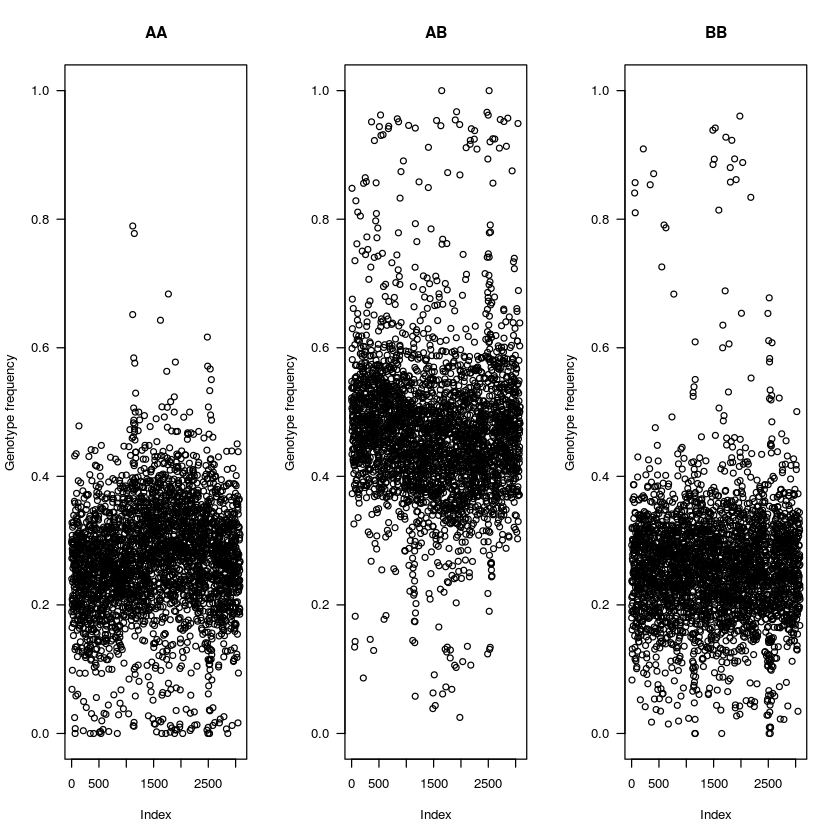

In [29]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

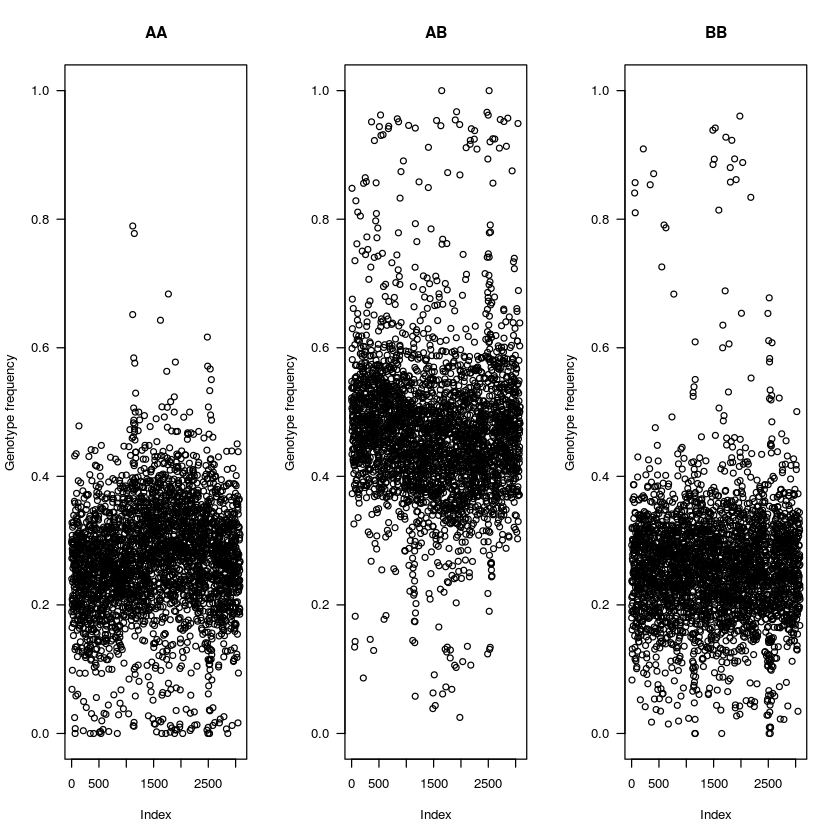

In [30]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [31]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [32]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [33]:
datf2.4 <- datf2.3

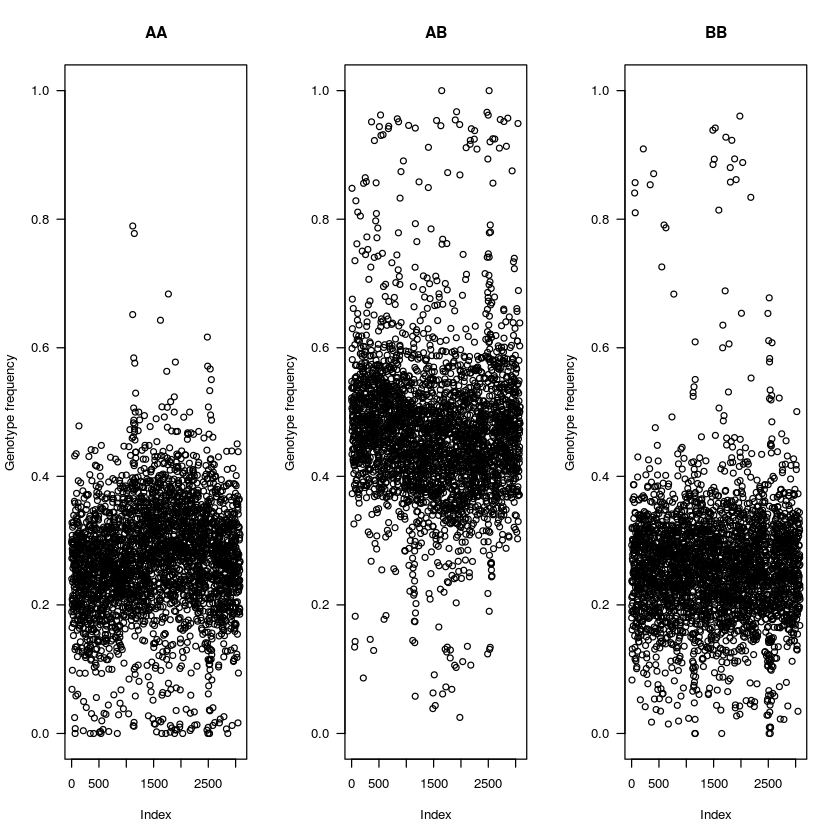

In [34]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [35]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

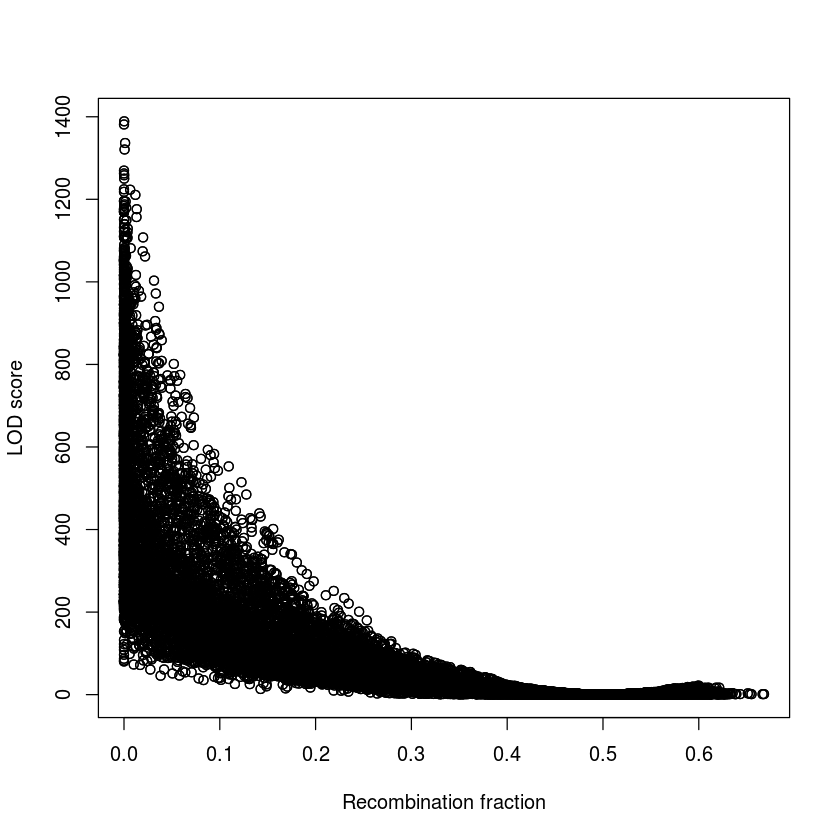

In [36]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

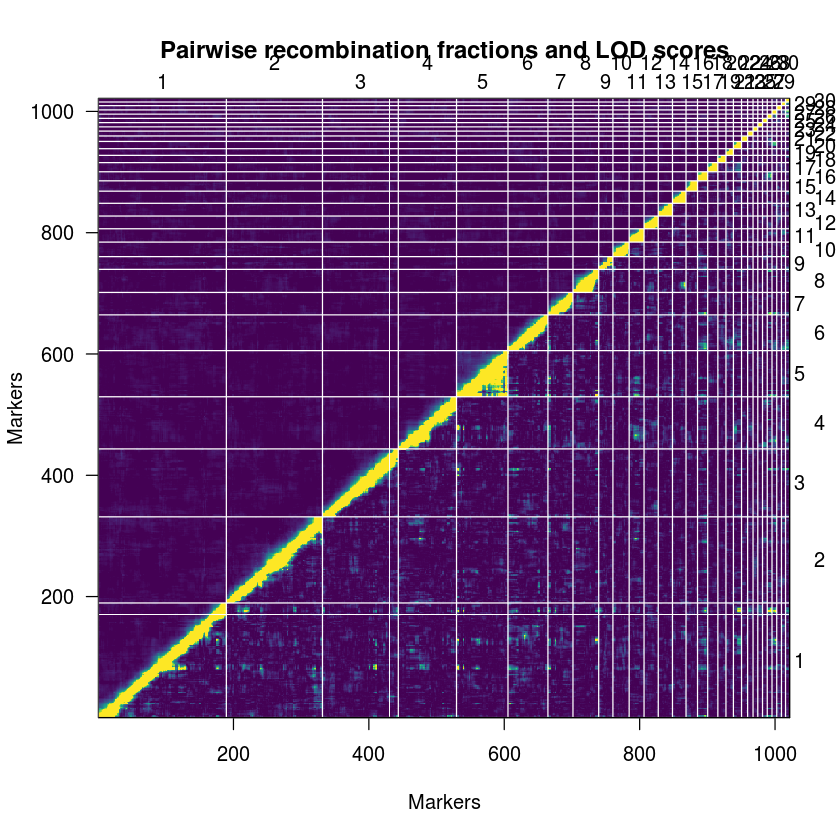

In [37]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [38]:
genmap <- est.map(datf2.4, error.prob=0.005)

Warning message in est.map(datf2.4, error.prob = 0.005):
“Didn't converge!”

In [39]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
1,189,501.2519849,2.66623396,15.5392258
2,142,357.1072366,2.53267544,13.5508359
3,112,258.2422217,2.32650650,17.3780495
4,86,244.7239853,2.87910571,15.7538084
5,76,176.7277219,2.35636963,16.1426127
6,59,153.1326793,2.64021861,9.9333418
7,37,91.0392015,2.52886671,12.1609088
8,38,98.1407780,2.65245346,16.3257674
9,21,65.4193744,3.27096872,24.5476203
10,24,33.1713108,1.44223091,7.2304387


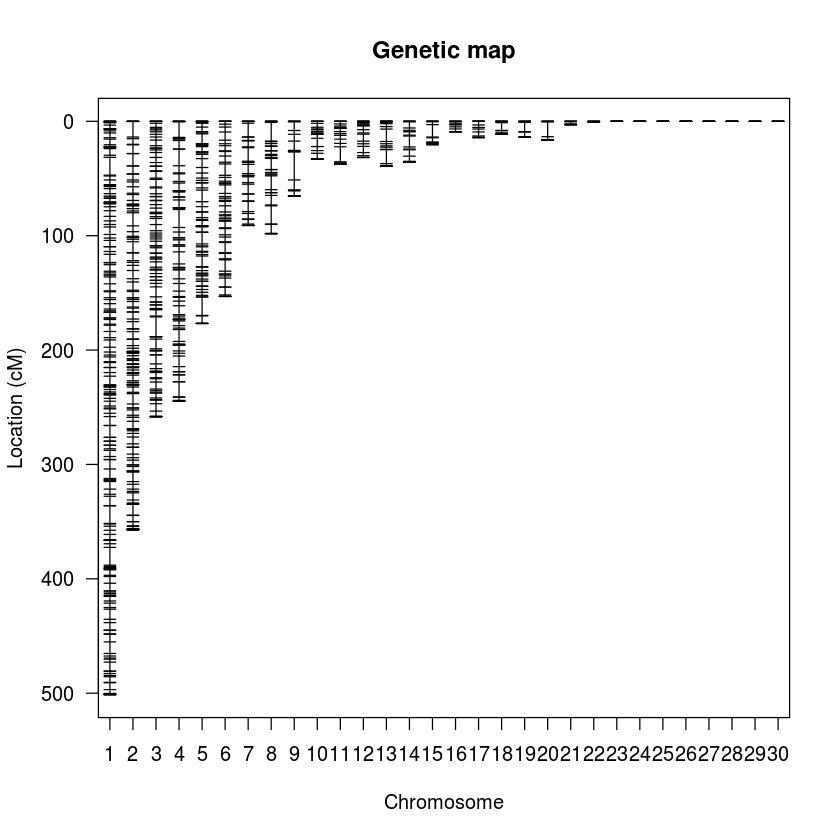

In [40]:
plotMap(genmap)

In [41]:
datf2.4 <- replace.map(datf2.4, genmap)

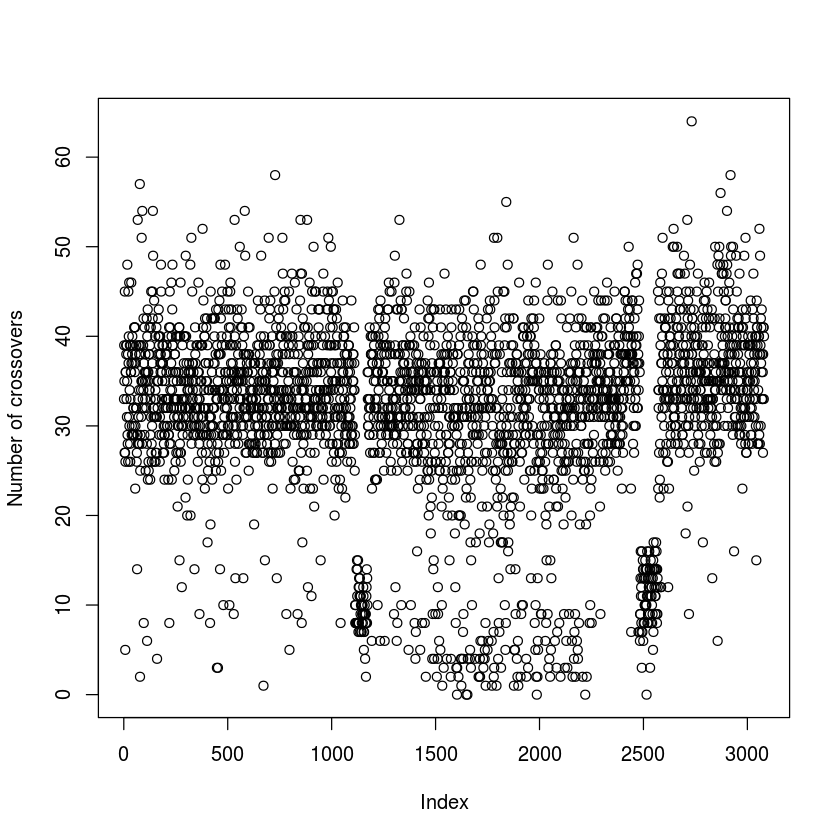

[1] 31.43279

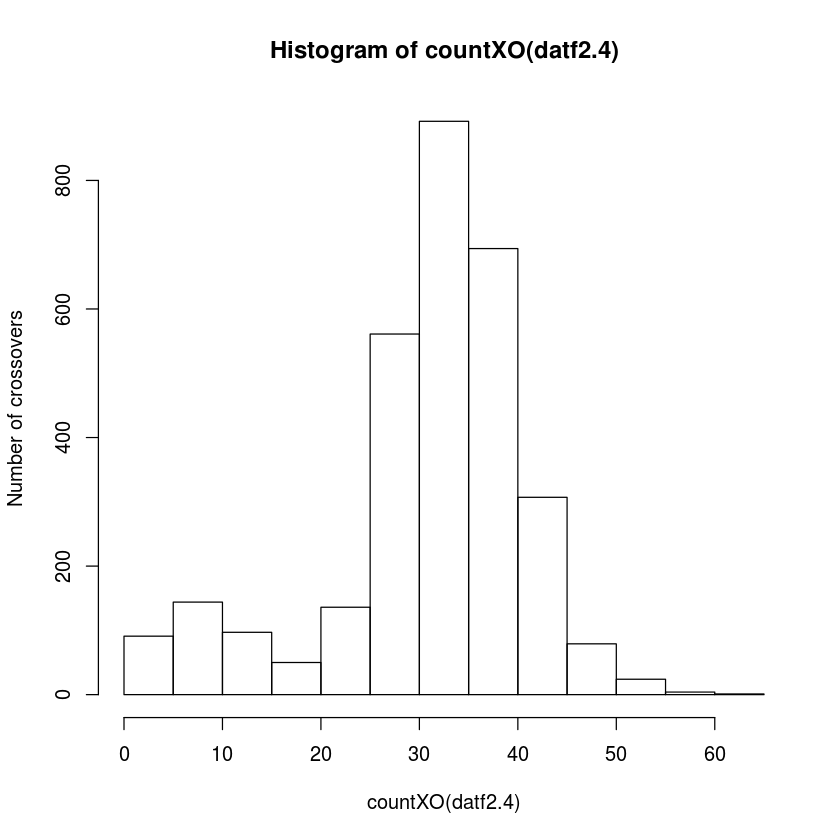

In [42]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [43]:
datf2.5 <- datf2.4

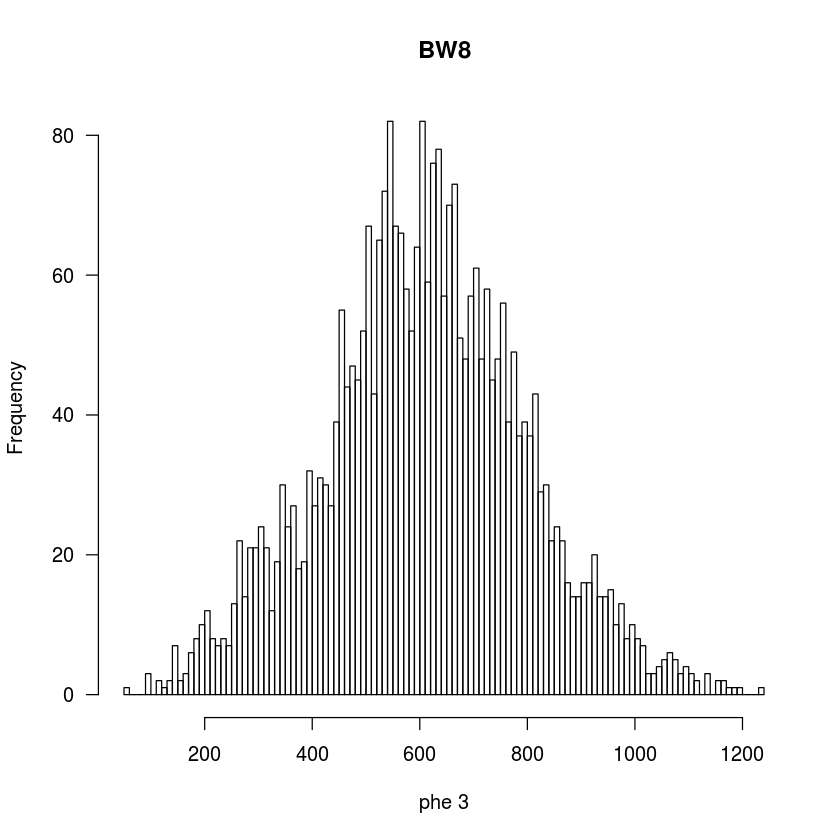

In [44]:
plotPheno(datf2.5, pheno.col=3)

In [45]:
#plotMissing(datf2.5, reorder=TRUE)

In [46]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [47]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [48]:
out.em <- scanone(datf2.5, pheno.col = 2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 2 individuals with missing phenotypes.
”

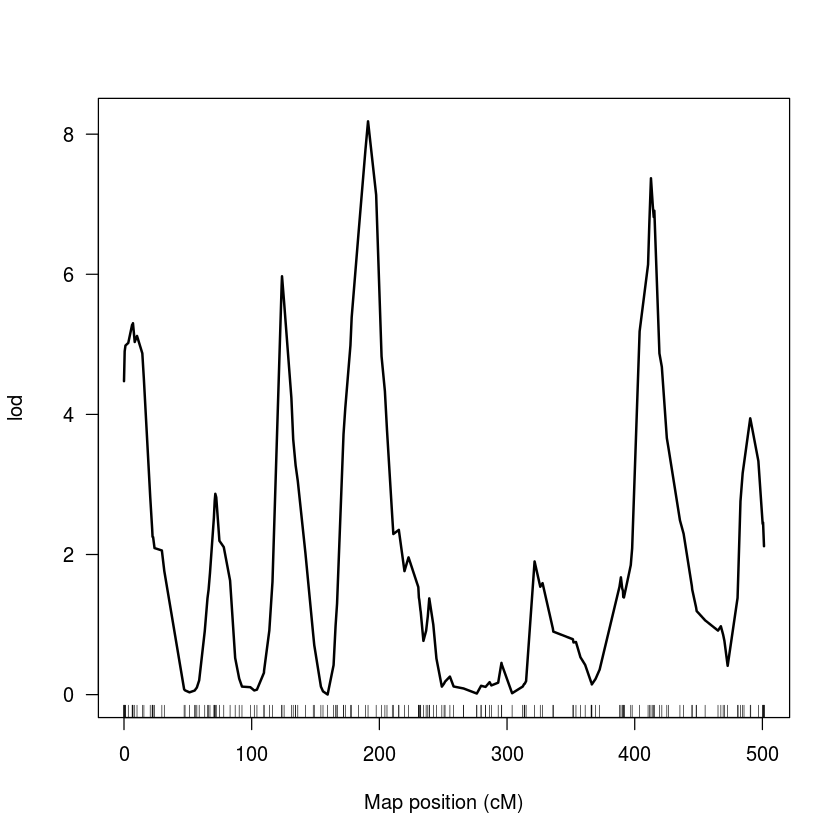

In [49]:
plot(out.em, chr=1)

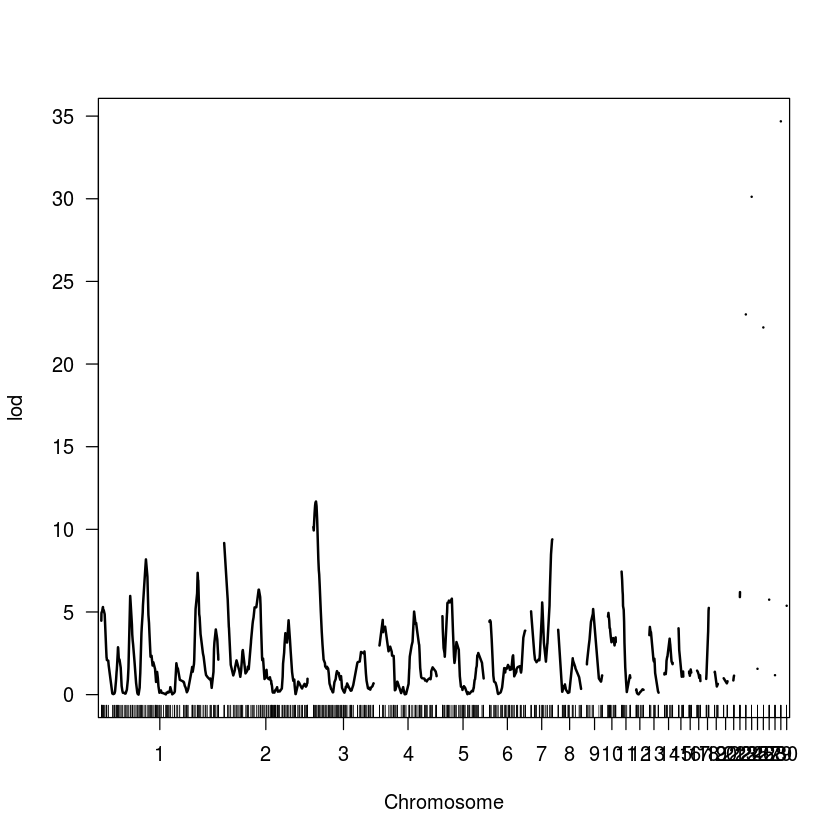

In [50]:
plot(out.em)

In [51]:
ac <- pull.pheno(datf2.5, c("SEX"))

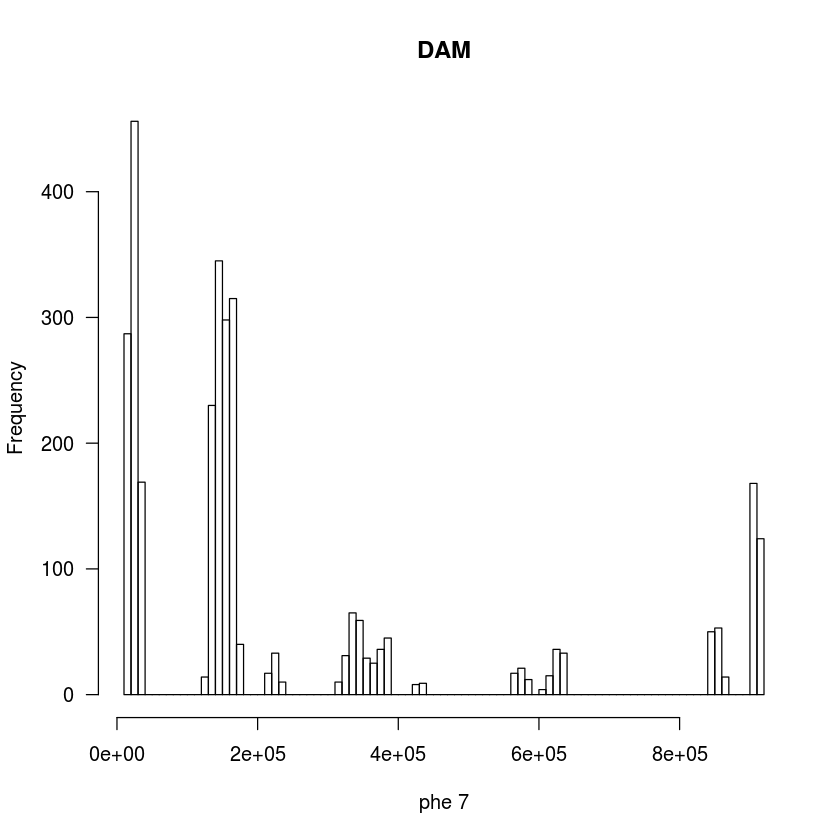

In [69]:
plotPheno(datf2.5, pheno.col = 7)

In [52]:
ac2 <- pull.pheno(datf2.5, c("SEX","GENERATION"))

In [53]:
ac3 <- pull.pheno(datf2.5, c("SEX","GENERATION","DAM"))

In [70]:
out.acovar <- scanone(datf2.5, pheno.col = 3, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

In [71]:
out.acovar2 <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

In [72]:
#out.acovar2 <- scanone(datf2.5, pheno.col = 3, addcovar=ac3)

In [74]:
#plot(out.acovar2)

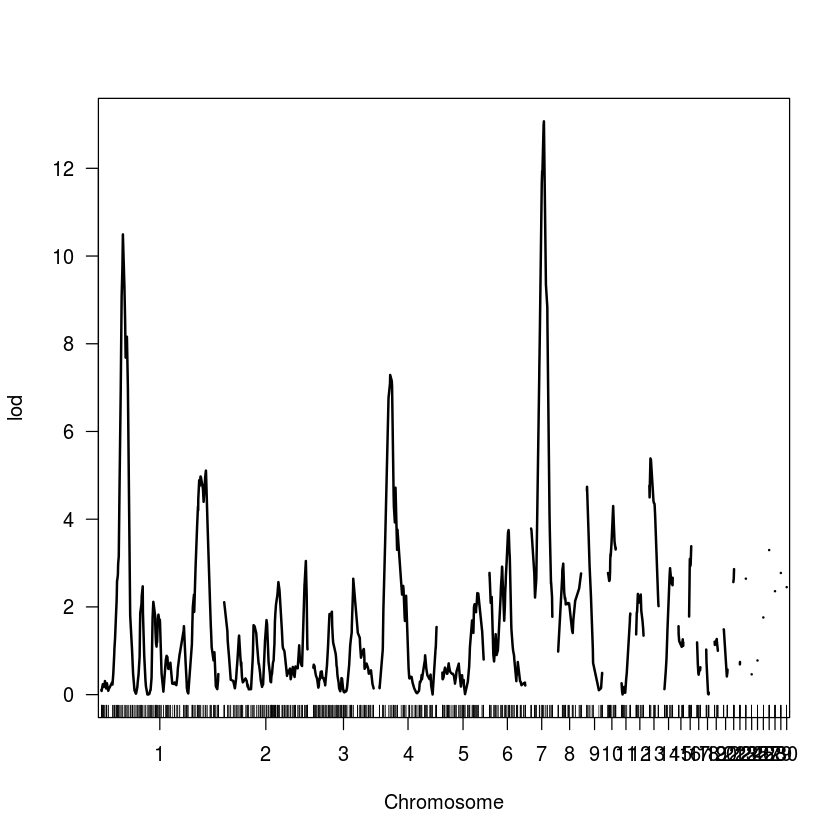

In [97]:
plot(out.acovar)

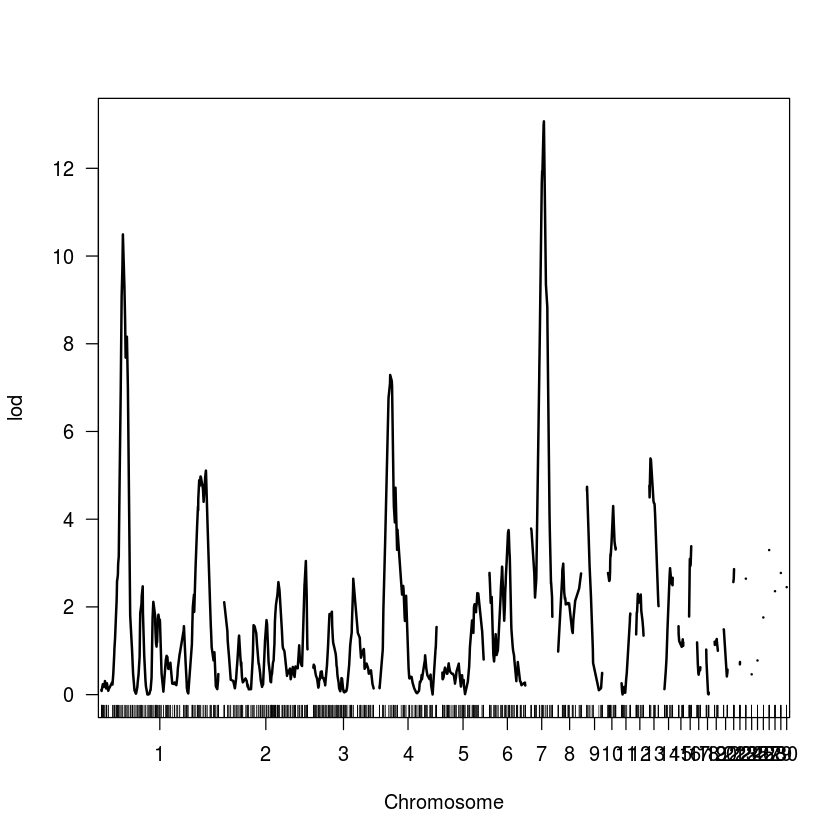

In [92]:
plot(out.acovar)

In [ ]:
out.acovar2

In [111]:
write.csv(out.acovar, "20200730_out_all_filtermiss_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_ctrlgen.csv")

In [98]:
out.acovar_2d <- scantwo(datf2.5, pheno.col = 3, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

 --Running scanone
 --Running scantwo
 (1,1)
 (1,2)
 (1,3)
 (1,4)
 (1,5)
 (1,6)
 (1,7)
 (1,8)
 (1,9)
 (1,10)
 (1,11)
 (1,12)
 (1,13)
 (1,14)
 (1,15)
 (1,16)
 (1,17)
 (1,18)
 (1,19)
 (1,20)
 (1,21)
 (1,22)
 (1,23)
 (1,24)
 (1,25)
 (1,26)
 (1,27)
 (1,28)
 (1,29)
 (1,30)
 (2,2)
 (2,3)
 (2,4)
 (2,5)
 (2,6)
 (2,7)
 (2,8)
 (2,9)
 (2,10)
 (2,11)
 (2,12)
 (2,13)
 (2,14)
 (2,15)
 (2,16)
 (2,17)
 (2,18)
 (2,19)
 (2,20)
 (2,21)
 (2,22)
 (2,23)
 (2,24)
 (2,25)
 (2,26)
 (2,27)
 (2,28)
 (2,29)
 (2,30)
 (3,3)
 (3,4)
 (3,5)
 (3,6)
 (3,7)
 (3,8)
 (3,9)
 (3,10)
 (3,11)
 (3,12)
 (3,13)
 (3,14)
 (3,15)
 (3,16)
 (3,17)
 (3,18)
 (3,19)
 (3,20)
 (3,21)
 (3,22)
 (3,23)
 (3,24)
 (3,25)
 (3,26)
 (3,27)
 (3,28)
 (3,29)
 (3,30)
 (4,4)
 (4,5)
 (4,6)
 (4,7)
 (4,8)
 (4,9)
 (4,10)
 (4,11)
 (4,12)
 (4,13)
 (4,14)
 (4,15)
 (4,16)
 (4,17)
 (4,18)
 (4,19)
 (4,20)
 (4,21)
 (4,22)
 (4,23)
 (4,24)
 (4,25)
 (4,26)
 (4,27)
 (4,28)
 (4,29)
 (4,30)
 (5,5)
 (5,6)
 (5,7)
 (5,8)
 (5,9)
 (5,10)
 (5,11)
 (5,12)
 (5,13)
 (5,14)
 (5,1

Warning message in plot.scantwo(out.acovar_2d, nodiag = FALSE):
“1098 LOD scores NA, set to 0”Warning message in plot.scantwo(out.acovar_2d, nodiag = FALSE):
“10 LOD scores <0, set to 0”

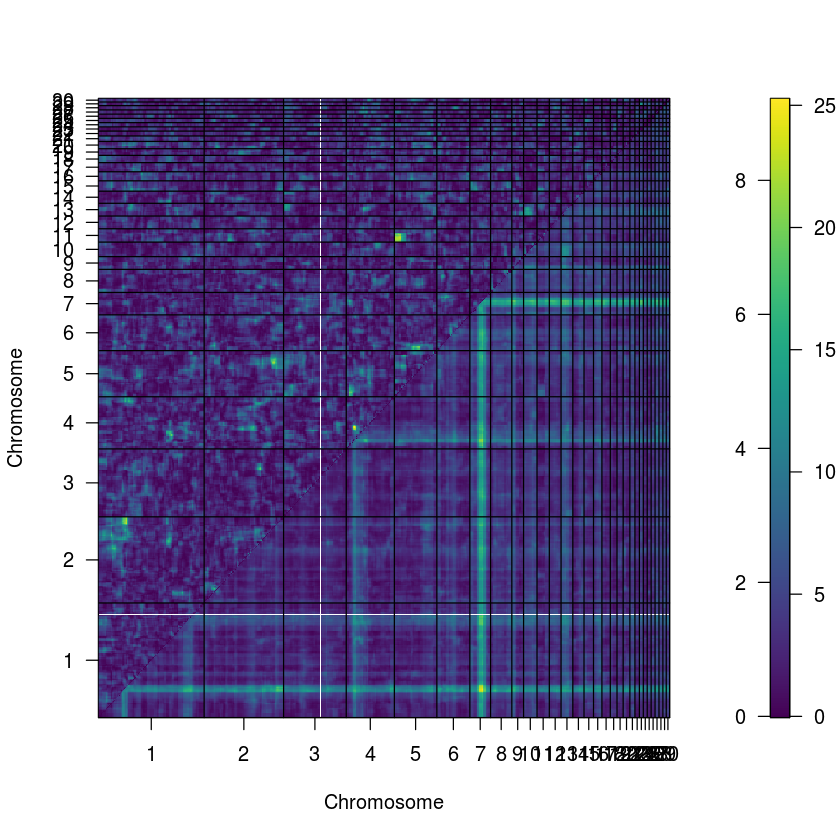

In [110]:
plot(out.acovar_2d, nodiag=FALSE)

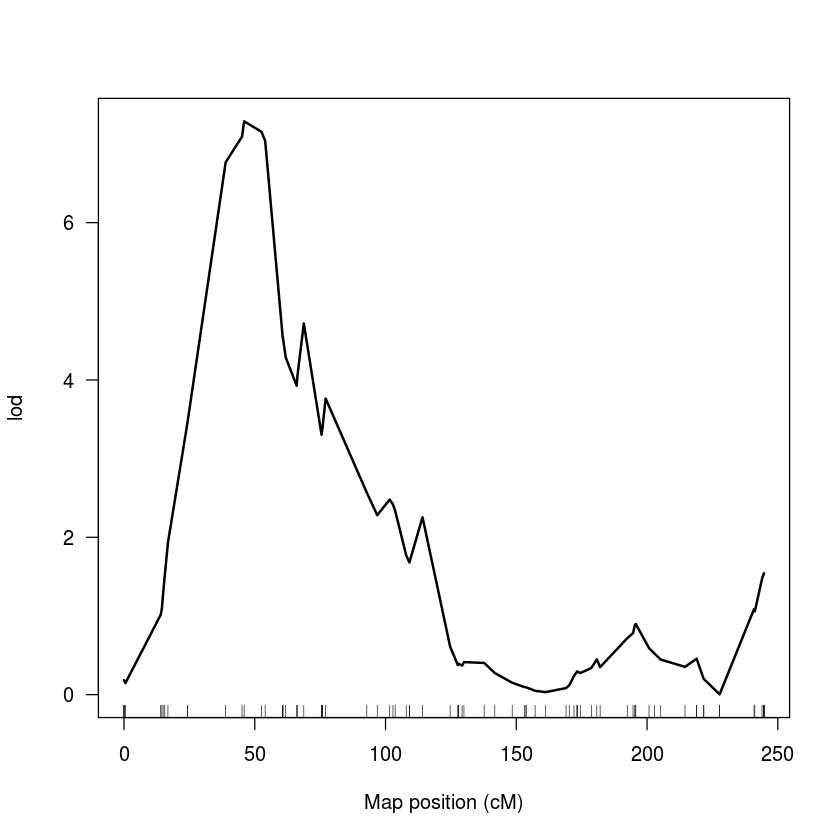

In [109]:
plot(out.acovar, chr=4)

In [107]:
out.acovar_2d

           pos1f    pos2f lod.full lod.fv1 lod.int     pos1a    pos2a lod.add
c1 :c1  9.24e+01 4.45e+02   17.854   7.360  1.4453  9.24e+01 4.48e+02  16.409
c1 :c2  9.24e+01 3.54e+02   18.990   8.497  6.0150  9.24e+01 2.32e+02  12.975
c1 :c3  9.24e+01 9.56e+01   15.093   4.600  2.1184  9.24e+01 1.71e+02  12.975
c1 :c4  9.24e+01 5.26e+01   17.610   7.116  0.2763  9.24e+01 4.59e+01  17.333
c1 :c5  9.24e+01 1.49e+02   15.461   4.967  2.1829  9.24e+01 1.49e+02  13.278
c1 :c6  9.24e+01 9.36e+00   15.817   5.323  1.8904  9.24e+01 7.93e+01  13.927
c1 :c7  9.24e+01 5.37e+01   25.233  12.161  2.2761  9.24e+01 5.50e+01  22.957
c1 :c8  9.24e+01 2.17e+01   17.643   7.150  4.2390  9.24e+01 9.81e+01  13.404
c1 :c9  9.24e+01 3.00e-07   17.276   6.782  2.5191  9.24e+01 5.42e-01  14.757
c1 :c10 9.24e+01 2.21e+01   14.525   4.031  0.1803  9.24e+01 2.21e+01  14.344
c1 :c11 9.24e+01 6.20e+00   12.993   2.499  0.7561  9.24e+01 3.72e+01  12.237
c1 :c12 9.24e+01 1.97e+01   15.833   5.339  2.9059  9.24e+01 1.9

In [112]:
save.image(file = "20200730_filtermiss.Rdata")